In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
??display

In [3]:
PATH = "data/bulldozers/"

In [4]:
!ls {PATH}

Test.csv  Train.csv  Valid.csv


In [6]:
! head {PATH}/Train.csv

In [5]:
df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, parse_dates=['saledate'])

In [8]:
df_raw.tail().T # transposta fica mais fácil de ler, pois há muitas colunas

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [6]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [10]:
display_all(df_raw.tail().T)

,401120,401121,401122,401123,401124
SalesID,6333336,6333337,6333338,6333341,6333342
SalePrice,10500,11000,11500,9000,7750
MachineID,1840702,1830472,1887659,1903570,1926965
ModelID,21439,21439,21439,21435,21435
datasource,149,149,149,149,149
auctioneerID,1,1,1,2,2
YearMade,2005,2005,2005,2005,2005
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-11-02 00:00:00,2011-10-25 00:00:00,2011-10-25 00:00:00


In [11]:
?pd.DataFrame.describe()

In [12]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
SalesID,401125,NaN,NaN,NaN,NaN,NaN,1.91971e+06,909021,1.13925e+06,1.41837e+06,1.63942e+06,2.24271e+06,6.33334e+06
SalePrice,401125,NaN,NaN,NaN,NaN,NaN,31099.7,23036.9,4750,14500,24000,40000,142000
MachineID,401125,NaN,NaN,NaN,NaN,NaN,1.2179e+06,440992,0,1.0887e+06,1.27949e+06,1.46807e+06,2.48633e+06
ModelID,401125,NaN,NaN,NaN,NaN,NaN,6889.7,6221.78,28,3259,4604,8724,37198
datasource,401125,NaN,NaN,NaN,NaN,NaN,134.666,8.96224,121,132,132,136,172
auctioneerID,380989,NaN,NaN,NaN,NaN,NaN,6.55604,16.9768,0,1,2,4,99
YearMade,401125,NaN,NaN,NaN,NaN,NaN,1899.16,291.797,1000,1985,1995,2000,2013
MachineHoursCurrentMeter,142765,NaN,NaN,NaN,NaN,NaN,3457.96,27590.3,0,0,0,3025,2.4833e+06
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,3919,2009-02-16 00:00:00,1932,1989-01-17 00:00:00,2011-12-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A métrica sugerida pelo Kaggle é a RMLSE (root mean squared log error) entre os preços atual e previsto. Logo, para facilitar, substituimos a variável alvo (dependente) - SalePrice - pelo seu log.

In [7]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

In [14]:
df_raw.SalePrice

0         11.097410
1         10.950807
2          9.210340
3         10.558414
4          9.305651
5         10.184900
6          9.952278
7         10.203592
8          9.975808
9         11.082143
10        10.085809
11        10.021271
12        10.491274
13        10.325482
14        10.239960
15         9.852194
16         9.510445
17         9.159047
18         9.433484
19         9.350102
20        10.621327
21        10.448715
22        10.165852
23        11.198215
24        10.404263
25         9.433484
26         9.648595
27        10.878047
28        10.736397
29        11.396392
            ...    
401095     9.259131
401096     9.210340
401097     9.047821
401098     9.259131
401099     9.305651
401100     9.259131
401101     9.210340
401102     9.259131
401103     9.433484
401104     9.259131
401105     9.210340
401106     9.259131
401107     9.433484
401108     9.259131
401109     9.259131
401110     9.259131
401111     9.210340
401112     9.259131
401113     9.259131


# Pré-processamento

In [15]:
?RandomForestRegressor

In [16]:
?df_raw.drop

In [15]:
# vamos criar uma RandomForest -- n_jobs = -1 indica que ele vai criar a quantidade de jobs igual a quantidade de cores
m = RandomForestRegressor(n_jobs=-1)
# o primeiro argumento de fit são as variáveis independentes; o segundo é a variável dependente, aquela que queremos prever
m.fit(df_raw.drop('SalePrice', axis=1), df_raw.SalePrice)

ValueError: could not convert string to float: 'Conventional'

O problema é que temos variáveis categóricas (não numéricas) nesse dataset - por isso o erro. Temos que fazer a conversão.

O método abaixo, add_datepart (que faz parte da biblioteca fastai), extrai os campos de um datetime - dia, mês, ano... O propósito disso é facilitar a construção de categorias. Permite também aumentar a granularidade do campo, o que pode ajudar na descoberta de tendências nos dados relacionadas a datas.

In [8]:
add_datepart(df_raw, 'saledate')
df_raw.saleYear.head()

0    2006
1    2004
2    2004
3    2011
4    2009
Name: saleYear, dtype: int64

A chamada abaixo - mais um método da biblioteca fastai - permite a conversão de strings em categorias do pandas; lembrar que é um requisito não ter strings nos dados para RandomForest funcionar.

PS.: esse é um tipo de mudança inplace, isto é, ela altera o dataframe atual.

In [9]:
train_cats(df_raw)

In [15]:
type(df_raw.UsageBand)

pandas.core.series.Series

In [10]:
df_raw.UsageBand.cat.categories

Index(['High', 'Low', 'Medium'], dtype='object')

In [11]:
# vamos 'ordenar' a lista de categorias anterior, de uma forma que faça mais sentido
df_raw.UsageBand.cat.set_categories(['High', 'Medium', 'Low'], ordered=True, inplace=True)

In [12]:
df_raw.UsageBand = df_raw.UsageBand.cat.codes

In [19]:
df_raw.UsageBand # com a chamada anterior, trocamos o High, Medium e Low por 2, 1 e 0.

0         2
1         2
2         0
3         0
4         1
5         2
6         0
7         0
8         2
9         1
10        1
11        2
12       -1
13        1
14        2
15        1
16        2
17       -1
18        2
19        1
20        1
21        1
22        2
23        0
24        1
25        1
26        2
27       -1
28        2
29        1
         ..
401095   -1
401096   -1
401097   -1
401098   -1
401099   -1
401100   -1
401101   -1
401102   -1
401103   -1
401104   -1
401105   -1
401106   -1
401107   -1
401108   -1
401109   -1
401110   -1
401111   -1
401112   -1
401113   -1
401114   -1
401115   -1
401116   -1
401117   -1
401118   -1
401119   -1
401120   -1
401121   -1
401122   -1
401123   -1
401124   -1
Name: UsageBand, Length: 401125, dtype: int8

In [13]:
# salvar o nosso trabalho feito até agora - feather format
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/bulldozers-raw')

In [14]:
# para ler o arquivo, é simples - e bastante rápido se comparado com o CSV
df_raw = pd.read_feather('tmp/bulldozers-raw')

Conforme já dito anteriormente, para passarmos os dados para a RandomForest, não podemos ter strings. Já vimos até aqui como transformar strings em categorias e categorias em códigos numéricos.

Um outro problema é que não podemos ter valores ausentes. Temos alguns...

In [22]:
display_all(df_raw.isnull().sum()) # os valores maiores que zero indicam a quantidade de ausentes!

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                        0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

O método abaixo da biblioteca fastai troca as categorias por seus respectivos códigos, trata os valores ausentes e separa a variável dependente.

In [15]:
df, y, nas = proc_df(df_raw, 'SalePrice')

## Random Forest

Agora temos dados prontos para serem passados para uma RandomForest :-)

In [24]:
m = RandomForestRegressor(n_jobs=-1)
m.fit(df,y)
m.score(df, y)

0.98302706630757231

Aqui tivemos um overfitting; o modelo é muito bom para os dados apresentados, mas não generaliza bem, isto é, ao ser apresentado com novos dados, o desempenho é ruim.

Para resolver isso, precisamos separar os conjuntos de teste/validação e o de treino.

In [25]:
# NÃO PRECISA RODAR ESSE CÉLULA - uma alternativa ao código da célula a seguir
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.029)
X_train.shape, y_train.shape, X_test.shape

X_train.shape, y_train.shape, X_test.shape

((389492, 66), (389492,), (11633, 66))

In [16]:
def split_vals(a,n): return a[:n].copy(), a[n:].copy()

n_test = 12000 # mesmo tamanho do conjunto de teste do Kaggle
n_train = len(df) - n_test
raw_train, raw_test = split_vals(df_raw, n_train)
X_train, X_test = split_vals(df, n_train)
y_train, y_test = split_vals(y, n_train)

X_train.shape, y_train.shape, X_test.shape

((389125, 66), (389125,), (12000, 66))

Agora vamos tentar novamente, com os conjuntos de treino e teste separados

In [17]:
def rmse(x,y): return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_test), y_test),
                m.score(X_train, y_train), m.score(X_test, y_test)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [28]:
m = RandomForestRegressor(n_jobs=-1)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 1min 19s, sys: 428 ms, total: 1min 20s
Wall time: 14.4 s
[0.09053760038456132, 0.24807726558972076, 0.98286860275948351, 0.8900938723447267]


O resultado 0.24 é muito bom - dá uma boa posição na competição. Entretanto, o score do set de test ainda está desajustado - overfitting. 

Para entender isso, vamos rodar o modelo utilizando uma única árvore.

### Somente uma árvore

In [41]:
# n_estimators nos permite definir a quantidade de árvores
m = RandomForestRegressor(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.5371269683343529, 0.5674541015387153, 0.39703966649954642, 0.4249449087372193]


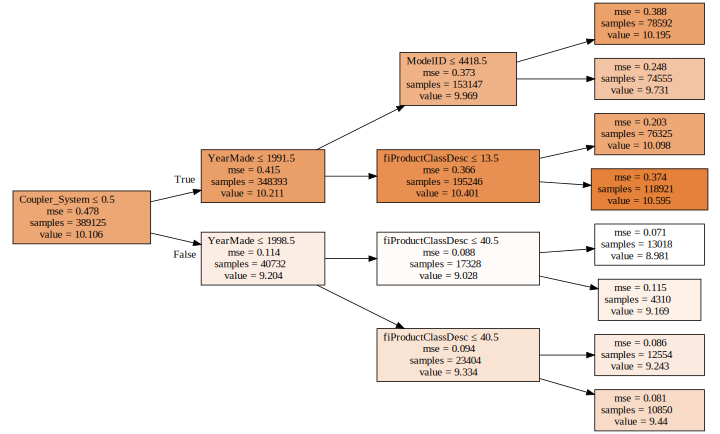

In [43]:
draw_tree(m.estimators_[0], df_trn, precision=3)

In [48]:
# vamos ver o que acontece com uma árvore maior - se não informa max_depth, ele vai expandindo a árvore
# até que as folhas sejam puras
m = RandomForestRegressor(n_estimators=1, bootstrap=False, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)


[8.58675118495947e-07, 0.3530029535889117, 0.99999999999845901, 0.77746175830302489]


O set de treino está bom, mas o de teste é pior do que o original!

Para generalizar melhor os resultados, precisamos aplicar o conceito de Bagging.

##  Bagging

In [18]:
# voltemos ao nosso modelo original
m = RandomForestRegressor(n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.09068941716247972, 0.25552810636863366, 0.98281110147590856, 0.88339281073470421]


Vamos pegar a previsão de cada árvore individual e olhar para um exemplo.

In [19]:
preds = np.stack([t.predict(X_test) for t in m.estimators_])
preds[:,0], np.mean(preds[:,0]), y_test[0]

(array([ 8.9872 ,  8.95545,  9.21034,  8.9872 ,  8.9359 ,  9.21034,  9.30565,  9.13238,  9.10498,  8.9872 ]),
 9.0816632093165435,
 9.1049798563183568)

In [20]:
preds.shape

(10, 12000)

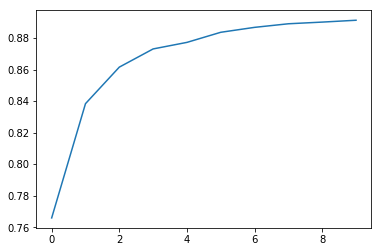

In [54]:
plt.plot([metrics.r2_score(y_test, np.mean(preds[:i+1], axis=0)) for i in range(10)]);

Conforme o gráfico mostra, a adição de mais árvores não modifica muito o resultado.
Podemos confirmar isso com os outputs dos códigos a seguir.

In [21]:
m = RandomForestRegressor(n_estimators=20, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.08276876769174617, 0.2436629278743773, 0.98568247979922452, 0.89397045668608288]


In [22]:
m = RandomForestRegressor(n_estimators=50, n_jobs=-1)
m.fit(X_train, y_train)
print_score(m)

[0.07756218420889964, 0.23668345235019522, 0.98742711661734617, 0.89995767762812795]


## OOB Score

Com as informações que temos, não conseguimos saber o motivo correto do overfitting; pode ser por que o nosso conjunto de teste seja de um período diferente do conjunto de validação ou porque o conjunto de validação seja pior do que o conjunto de teste ou, até mesmo, uma mistura dos dois motivos!

Random forests nos fornecem a medida chamada OOB (out-of-bag) error que nos permite lidar com essa situação.

A ideia é calcular o erro no conjunto de treino, mas incluir apenas as árvores no cálculo do erro de uma linha em que essa linha não foi incluída no treinamento dessa árvore. Isso nos permite verificar se o modelo está sofrendo de overfitting, sem a necessidade de um conjunto de validação separado.

Isso também nos permite saber se nosso modelo generaliza, mesmo se só temos uma pequena quantidade de dados - o que nos leva a evitar a separação de dados para criar um conjunto de validação.

Veja como é simples usar o OOB error (ele é impresso por último na função print_score).

In [23]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07828863633906522, 0.237495762879468, 0.98719049690567162, 0.89926979780614236, 0.90854796621454326]


O valor do oob_score nos permite concluir que a diferença de período existente em nosso set de validação está causando o over-fitting.

## Redução de overfitting - Subsampling

Vamos utilizar o subsampling para reduzir o overfitting - e ainda ganhamos rapidez na análise.

A ideia básica é: em vez de limitarmos a quantidade de dado que nosso modelo pode acessar, limitamos o acesso a um sub-conjunto aleatório por cada aŕvore. Dessa forma, com uma quantidade suficiente de árvores, o nosso modelo é capaz de visualizar todo os dados, mas cada árvore será mais rápida.

In [30]:
set_rf_samples(20000)

In [31]:
m = RandomForestRegressor(n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 8.79 s, sys: 880 ms, total: 9.67 s
Wall time: 4.72 s
[0.24059818694075905, 0.2824109814032233, 0.87901834346856744, 0.85756683198273131, 0.8663942716832973]


A título de comparação, abaixo o output do tempo sem o <b>subsampling</b>.

CPU times: user 1min 19s, sys: 428 ms, total: 1min 20s <br/>
Wall time: 14.4 s

Conforme dito anteriomente, cada árvore adicional permite ao modelo acessar mais dados; logo, diferente do que foi feito anteriomente, a adição de mais árvores se torna mais útil.

In [32]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
%time m.fit(X_train, y_train)
print_score(m)

CPU times: user 35.7 s, sys: 2.23 s, total: 37.9 s
Wall time: 13.9 s
[0.22727447328977435, 0.2619399067200129, 0.89204664449897952, 0.87746749530940726, 0.88047506126360198]


## Redução de overfitting - Parâmetros de construção da árvore (Tree building parameters)

In [33]:
# voltando ao conjunto inteiro - retirando o subsampling
reset_rf_samples()

Outra maneira de reduzir overfitting é fazer com que nossas árvores cresçam de forma menos profunda - queremos ter um número mínimo de linhas em cada nó folha. Fazemos isso especificando o atributo <b>min_samples_leaf</b>. Isso nos traz 2 benefícios:

- Há menos regras de decisão em cada folha; modelos mais simples devem generalizar melhor
- As previsões são feitas pela média de mais linhas no nó da folha, resultando em menos volatilidade

Primeiramente, vamos ter uma baseline de comparação.

In [34]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.07828022238949854, 0.2367797082550614, 0.98719325012060521, 0.89987628940858677, 0.90860534049305552]


In [35]:
# agora vamos utilizar o min_samples_leaf
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, min_samples_leaf=3)
m.fit(X_train, y_train)
print_score(m)

[0.11507698284974516, 0.2331668024007927, 0.97232346228726929, 0.90290845592843028, 0.90829115242505953]


O over-fitting diminuiu (veja que o score de treino passou de .987 para .972); e o modelo teve um melhor resultado também (.236 -> .233 - aqui a escala é log!).

Podemos combinar o atributo anterior com outros!

Também podemos aumentar a quantidade de variação entre as árvores, não apenas usando uma amostra de linhas para cada árvore, mas também usando uma amostra de colunas para cada divisão. Fazemos isso especificando <b>max_features</b>, que é a proporção de <i>features</i> para selecionar <b>aleatoriamente</b> em cada divisão.

Pode ser um valor 

- inteiro (valor absoluto), 
- float (porcentagem), 
- string (auto - esse é o padrão, sqrt ou log2 das features) ou 
- None (todas as features serão usadas).

Abaixo uma comparação de valores diferentes de max_features.

In [37]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, min_samples_leaf=3, max_features=0.5)
m.fit(X_train, y_train)
print_score(m)

[0.1190839201141498, 0.22834557117421733, 0.97036253381208259, 0.90688210293116034, 0.91167249084642088]


In [38]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, min_samples_leaf=3, max_features='log2')
m.fit(X_train, y_train)
print_score(m)

[0.17509606253311757, 0.27527743398928184, 0.93592515177932667, 0.86467152224948751, 0.88414968162236207]


In [39]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, min_samples_leaf=3, max_features='sqrt')
m.fit(X_train, y_train)
print_score(m)

[0.1575456668846098, 0.2628798525345834, 0.94812623719416533, 0.87658652561250738, 0.89510675574331866]


In [41]:
m = RandomForestRegressor(n_estimators=40, n_jobs=-1, oob_score=True, min_samples_leaf=3, max_features=None)
m.fit(X_train, y_train)
print_score(m)

[0.11500893310778364, 0.23339468957466097, 0.9723561851540462, 0.90271857701071367, 0.90845991835068363]


Para efeitos de comparação, dobrei o número de árvores.

In [42]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True, min_samples_leaf=3, max_features=0.5)
m.fit(X_train, y_train)
print_score(m)

[0.11781083442731342, 0.2264930773401375, 0.97099283468118902, 0.90838684514761403, 0.9145732438148797]


In [43]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True, min_samples_leaf=3, max_features='log2')
m.fit(X_train, y_train)
print_score(m)

[0.17438150384575482, 0.2780913102733338, 0.93644705747025248, 0.86189073605583633, 0.8874519347326506]


In [44]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True, min_samples_leaf=3, max_features='sqrt')
m.fit(X_train, y_train)
print_score(m)

[0.15636366523601963, 0.25972162120766984, 0.94890169314888806, 0.87953408484466633, 0.89875132327951845]


In [45]:
m = RandomForestRegressor(n_estimators=80, n_jobs=-1, oob_score=True, min_samples_leaf=3, max_features=None)
m.fit(X_train, y_train)
print_score(m)

[0.11371311718775216, 0.2327720291694423, 0.97297560650747228, 0.90323694776158792, 0.91129179661840565]
